In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Softmax
import pickle
import matplotlib.image as mpimg
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [2]:
import os
cwd = os.getcwd()
print(cwd)

/home/michael/Documents/AI/Health-App-ML


/home/michael/Documents/AI/Health-App-ML/Chickenpox


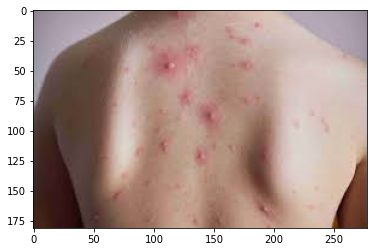

In [3]:
Datadir = os.getcwd()
Categories = ["Chickenpox", "Hf&m", "Measles", "Mumps", "Roseola", "Rubella", "Scarlet Fever", "Scd", "Skin"]

for Category in Categories:
    path = os.path.join(Datadir, Category)
    print(path)
    for img in os.listdir(path):
        bgr_image = cv2.imread(os.path.join(path, img))
        rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_image)
        plt.show()
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

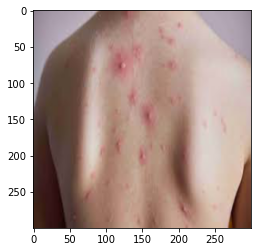

In [6]:
IMG_SIZE = 300

new_array = cv2.resize(rgb_image, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show

In [7]:
def create_training_data(Datadir, Categories, IMG_SIZE):
    training_data = []
    for class_num, Category in enumerate(Categories):
        path = os.path.join(Datadir, Category)
        for img in os.listdir(path):
            try:
                bgr_image = cv2.imread(os.path.join(path, img))
                rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
                resized_image = cv2.resize(rgb_image, (IMG_SIZE, IMG_SIZE))
                training_data.append([resized_image, class_num])
            except Exception as e:
                pass
    return training_data

            
training_data = create_training_data(Datadir, Categories, IMG_SIZE)

In [8]:
import random
random.shuffle(training_data)

In [9]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

In [10]:
print(X[0].shape)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)/256
y = np.array(y)
print(X.shape)
print(X.shape[1:])

(300, 300, 3)
(618, 300, 300, 3)
(300, 300, 3)


In [11]:
#pickle_out = open("x.pickle", "wb")
#pickle.dump = (X, pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle", "wb")
#pickle.dump = (y, pickle_out)
#pickle_out.close()

In [12]:
#X = pickle.load(open("x.pickle", "rb"))
#y = pickle.load(open("y.pickle", "rb"))

#X = x/255.0

num_categoris = len(Categories)

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(num_categoris))
#model.add(Activation('sigmoid'))
model.add(Softmax())

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             optimizer = "adam",
             metrics = ['accuracy'])

In [13]:
tensor_x = tf.convert_to_tensor(X, dtype=tf.float32)
tensor_y = tf.convert_to_tensor(y, dtype=tf.float32)

In [14]:
model.fit(tensor_x, tensor_y, batch_size=32, epochs=20, validation_split=0.1)

Train on 556 samples, validate on 62 samples
Epoch 1/20
556/556 [==============================] - 17s 30ms/sample - loss: 12.4751 - accuracy: 0.1475 - val_loss: 2.1836 - val_accuracy: 0.1935
Epoch 2/20
556/556 [==============================] - 17s 30ms/sample - loss: 2.0640 - accuracy: 0.2896 - val_loss: 2.2925 - val_accuracy: 0.1290
Epoch 3/20
556/556 [==============================] - 16s 28ms/sample - loss: 1.7305 - accuracy: 0.4335 - val_loss: 2.3447 - val_accuracy: 0.2258
Epoch 4/20
556/556 [==============================] - 16s 29ms/sample - loss: 1.2739 - accuracy: 0.6115 - val_loss: 2.3979 - val_accuracy: 0.1935
Epoch 5/20
556/556 [==============================] - 15s 28ms/sample - loss: 0.8847 - accuracy: 0.7698 - val_loss: 2.6416 - val_accuracy: 0.2258
Epoch 6/20
556/556 [==============================] - 16s 29ms/sample - loss: 0.6558 - accuracy: 0.8237 - val_loss: 2.6695 - val_accuracy: 0.2581
Epoch 7/20
556/556 [==============================] - 15s 28ms/sample - loss: 

In [15]:
for i in range(20):
    image, label = training_data[i]
    #lt.imshow(image)
    #lt.show()
    reshaped_image = image.reshape(-1,IMG_SIZE, IMG_SIZE, 3)
    tensor_image = tf.convert_to_tensor(reshaped_image, dtype=tf.float32, dtype_hint=None, name=None)
    #print(tensor_image.shape)

    result = model(tensor_image)
    #["Chickenpox", "Hf&m", "Measles", "Mumps", "Roseola", "Rubella", "Scarlet Fever", "Scd", "Skin"]
    #print(result)
    prediction = np.argmax(result)
    correct = (label == prediction)
    correct = "Correct" if correct else "Wrong"
    print("{} -> {} {}".format(label, prediction, correct))

0 -> 0 Correct
3 -> 3 Correct
1 -> 1 Correct
4 -> 4 Correct
4 -> 4 Correct
4 -> 4 Correct
5 -> 5 Correct
1 -> 1 Correct
6 -> 6 Correct
7 -> 7 Correct
6 -> 6 Correct
0 -> 0 Correct
4 -> 8 Wrong
1 -> 1 Correct
0 -> 0 Correct
6 -> 6 Correct
6 -> 6 Correct
2 -> 2 Correct
3 -> 3 Correct
3 -> 3 Correct


In [16]:
tf.saved_model.save(model, Datadir)

#concrete_func = model.__call__.get_concrete_function()

#converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
#tflite_model = converter.convert()

# Save the model.
#with open('model.tflite', 'wb') as f:
#    f.write(tflite_model)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/michael/Documents/AI/Health-App-ML/assets


In [17]:
loaded_model = tf.keras.models.load_model(Datadir)
for i in range(20):
    image, label = training_data[i]
    #lt.imshow(image)
    #lt.show()
    reshaped_image = image.reshape(-1,IMG_SIZE, IMG_SIZE, 3)
    tensor_image = tf.convert_to_tensor(reshaped_image, dtype=tf.float32, dtype_hint=None, name=None)
    #print(tensor_image.shape)

    result = loaded_model(tensor_image)
    #["Chickenpox", "Hf&m", "Measles", "Mumps", "Roseola", "Rubella", "Scarlet Fever", "Scd", "Skin"]
    #print(result)
    prediction = np.argmax(result)
    correct = (label == prediction)
    correct = "Correct" if correct else "Wrong"
    print("{} -> {} {}".format(label, prediction, correct))

0 -> 0 Correct
3 -> 3 Correct
1 -> 1 Correct
4 -> 4 Correct
4 -> 4 Correct
4 -> 4 Correct
5 -> 5 Correct
1 -> 1 Correct
6 -> 6 Correct
7 -> 7 Correct
6 -> 6 Correct
0 -> 0 Correct
4 -> 8 Wrong
1 -> 1 Correct
0 -> 0 Correct
6 -> 6 Correct
6 -> 6 Correct
2 -> 2 Correct
3 -> 3 Correct
3 -> 3 Correct


In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model(Datadir)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)